I will be carrying out an explanatory analysis on auto trade data set. The aim of the analysis is not only to understand the data set better but also answer some of the questions below:

- What are the average car prices?

- What is the relationship between car prices and mileage?

- What engine size is most common on auto trade?

- What type of car is listed most by Petrol vs Diesel vs Hybrid?

- Which car maker has the most listing?

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
data = pd.read_csv('Data_Cleaning.csv',index_col=0)

In [17]:
data.head()

,Car_Title,Car_Price,Car_Year,Car_Type_Door,Car_Mileage,Car_engine_size,Car_Horse_PW,Car_Type_Vehicle,Car_Filling_in,Car_Make
0,Hyundai Tucson 1.6 GDi SE Manual 5dr,13699,2018,SUV,19228,1.6L,132PS,Manual,Petrol,Hyundai
1,BMW 2 Series 3.0 M235i Sport Auto (s/s) 2dr,19000,2016,Coupe,12000,3.0L,326BHP,Automatic,Petrol,BMW
2,Nissan Note 1.6 16v Acenta 5dr,1205,2007,Hatchback,70699,1.6L,109BHP,Manual,Petrol,Nissan
3,Volkswagen Touareg 5.0 TDI V10 5dr,5750,2005,SUV,137000,5.0L,307BHP,Automatic,Diesel,Volkswagen
4,Audi A1 2.0 TDI Amplified Edition Sportback 5...,35000,2012,Hatchback,95000,2.0L,141BHP,Manual,Diesel,Audi


In [18]:
data.shape

(8553, 10)

In [19]:
data.isnull().sum()

Car_Title           0
Car_Price           0
Car_Year            0
Car_Type_Door       0
Car_Mileage         0
Car_engine_size     0
Car_Horse_PW        0
Car_Type_Vehicle    0
Car_Filling_in      0
Car_Make            0
dtype: int64

In [20]:
data.dtypes

Car_Title           object
Car_Price            int64
Car_Year             int64
Car_Type_Door       object
Car_Mileage          int64
Car_engine_size     object
Car_Horse_PW        object
Car_Type_Vehicle    object
Car_Filling_in      object
Car_Make            object
dtype: object

In [21]:
data['Car_Year'] = data['Car_Year'].astype('str')

In [22]:
data.head()

,Car_Title,Car_Price,Car_Year,Car_Type_Door,Car_Mileage,Car_engine_size,Car_Horse_PW,Car_Type_Vehicle,Car_Filling_in,Car_Make
0,Hyundai Tucson 1.6 GDi SE Manual 5dr,13699,2018,SUV,19228,1.6L,132PS,Manual,Petrol,Hyundai
1,BMW 2 Series 3.0 M235i Sport Auto (s/s) 2dr,19000,2016,Coupe,12000,3.0L,326BHP,Automatic,Petrol,BMW
2,Nissan Note 1.6 16v Acenta 5dr,1205,2007,Hatchback,70699,1.6L,109BHP,Manual,Petrol,Nissan
3,Volkswagen Touareg 5.0 TDI V10 5dr,5750,2005,SUV,137000,5.0L,307BHP,Automatic,Diesel,Volkswagen
4,Audi A1 2.0 TDI Amplified Edition Sportback 5...,35000,2012,Hatchback,95000,2.0L,141BHP,Manual,Diesel,Audi


In [23]:
data['Car_Year'] = pd.to_datetime(data['Car_Year'])

# Car Prices

Text(0.5, 1.0, 'Distribution of the car prices')

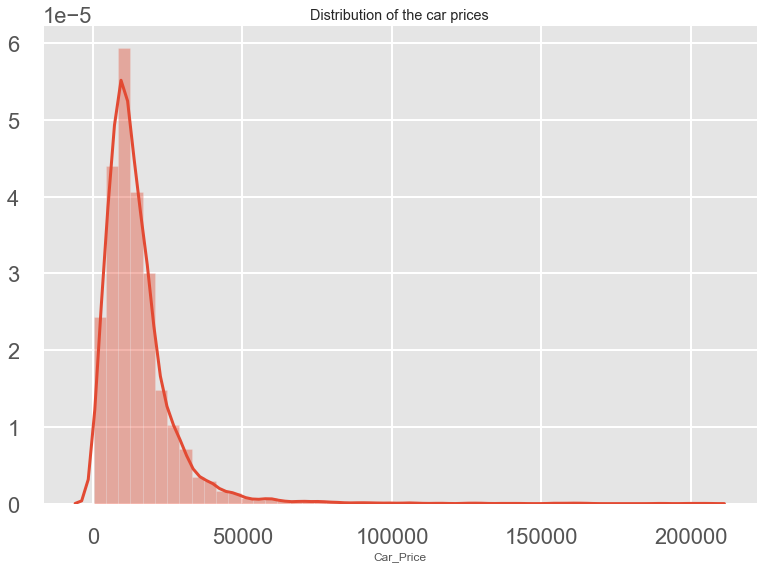

In [63]:
import matplotlib.style as style 
style.use('ggplot')

sns.distplot(data.Car_Price)
plt.title('Distribution of the car prices')

In [25]:
data['Car_Price'].describe()

count      8553.000000
mean      14905.762656
std       12613.107892
min         250.000000
25%        7872.000000
50%       12000.000000
75%       18426.000000
max      205000.000000
Name: Car_Price, dtype: float64

- Average Car Prices are around £12,000 and the highest listed Car is worth £200,500.

- The cheapest car on the list is worth £250.

In [26]:
cheapest = data[data['Car_Price']==250]
cheapest

,Car_Title,Car_Price,Car_Year,Car_Type_Door,Car_Mileage,Car_engine_size,Car_Horse_PW,Car_Type_Vehicle,Car_Filling_in,Car_Make
7848,Citroen Xsara Picasso 1.6 HDi Exclusive 5dr,250,2005-01-01,MPV,101000,1.6L,110BHP,Manual,Diesel,Citroen


The cheapest car on the list is Citroen with 101,000 Mileage from 2005.

In [27]:
Highest = data[data['Car_Price']>=200000]
Highest

,Car_Title,Car_Price,Car_Year,Car_Type_Door,Car_Mileage,Car_engine_size,Car_Horse_PW,Car_Type_Vehicle,Car_Filling_in,Car_Make
3498,Ferrari 488 3.9T V8 Spider F1 DCT (s/s) 2dr,205000,2018-01-01,Convertible,3100,3.9L,669PS,Automatic,Petrol,Ferrari


The most expensive car on list is Ferrari 488 with 3,100 mileage from 2018. 

# Outliers

Text(0.5, 1.0, 'Boxplot for Car Prices')

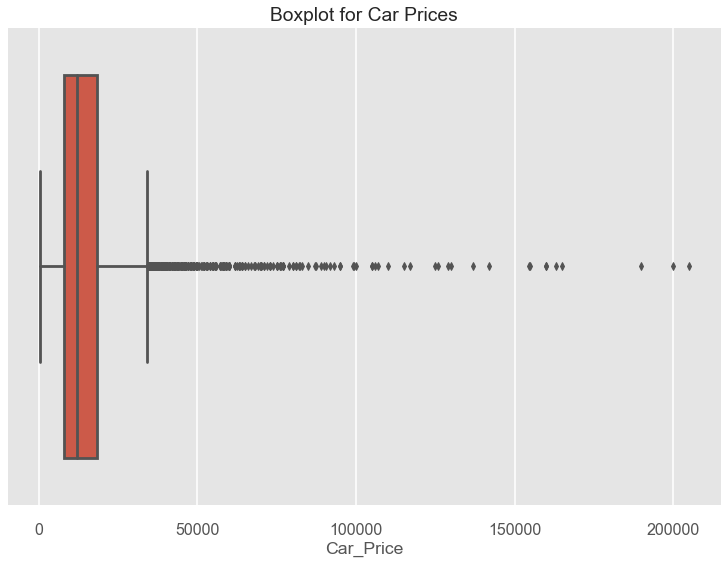

In [28]:
style.use('seaborn-poster')
sns.boxplot(data.Car_Price)
plt.title('Boxplot for Car Prices')

we can see that there are alot of outliers in the dataset as the car prices are skewed to right hand side. 

- Calculating the Inter Quartile Range

- Upper and Lower Quartile

In [29]:
IQR = data.Car_Price.quantile(0.75) - data.Car_Price.quantile(0.25)
Q1 = data.Car_Price.quantile(0.25)
Q3 = data.Car_Price.quantile(0.75)

## Use the following method to remove outliers
![title](Images/Outliers.png)


In [30]:
new_file = data[(data['Car_Price'] >= (Q1 - 1.5 * IQR)) & (data['Car_Price'] <= (Q1 + 1.5 * IQR))]


In [31]:
print('After Removing Outliers :',new_file.shape)

After Removing Outliers : (7368, 10)


Text(0.5, 1.0, 'Distrubtion of Car Prices without Outliers')

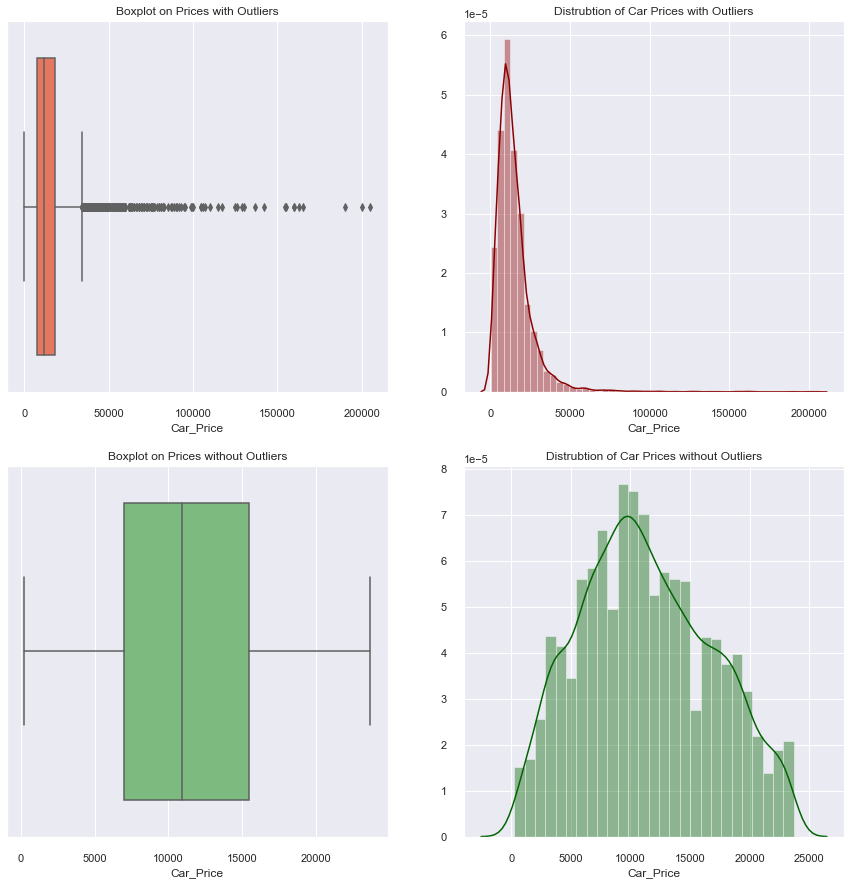

In [32]:
sns.set(style="darkgrid")
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig,ax=plt.subplots(2,2,figsize=(15,15),squeeze=False)
sns.boxplot(data.Car_Price,ax=ax[0][0], palette='Reds')
sns.distplot(data.Car_Price,ax=ax[0][1], color='darkred')
sns.boxplot(new_file.Car_Price,ax=ax[1][0], palette='Greens')
sns.distplot(new_file.Car_Price,ax=ax[1][1], color='darkgreen')

ax[0][0].set_title('Boxplot on Prices with Outliers')
ax[0][1].set_title('Distrubtion of Car Prices with Outliers')
ax[1][0].set_title('Boxplot on Prices without Outliers')
ax[1][1].set_title('Distrubtion of Car Prices without Outliers')


From the graphs above, we can see after removing all the outliers the car prices much more normally distributed

# Mileage

Text(0.5, 1.0, 'Boxplot on car Mileage')

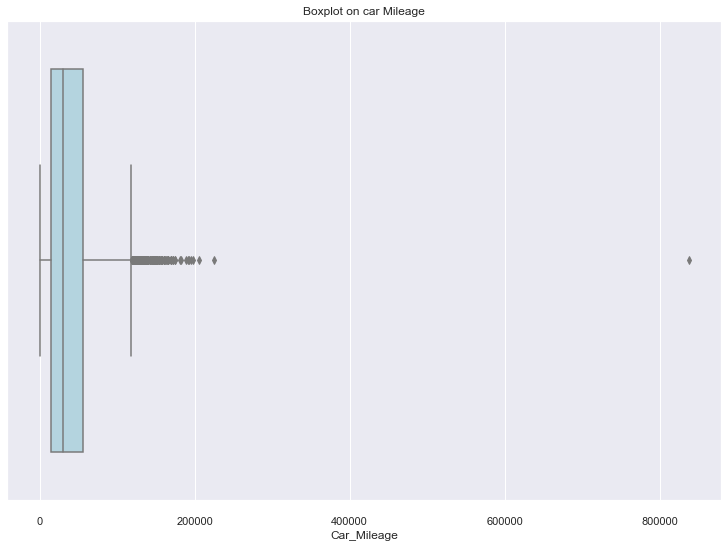

In [33]:
sns.boxplot(new_file.Car_Mileage, color='lightblue')
plt.title('Boxplot on car Mileage')

In [34]:
Mil = new_file[new_file['Car_Mileage']<800000]

### Manually removing outliers from car mileage column

In [35]:
new_data = new_file[new_file['Car_Mileage']<200000]


In [36]:
print('After Removing Outliers :',new_data.shape)

After Removing Outliers : (7365, 10)


Text(0.5, 1.0, 'Histogram of Car Mileage without outlers')

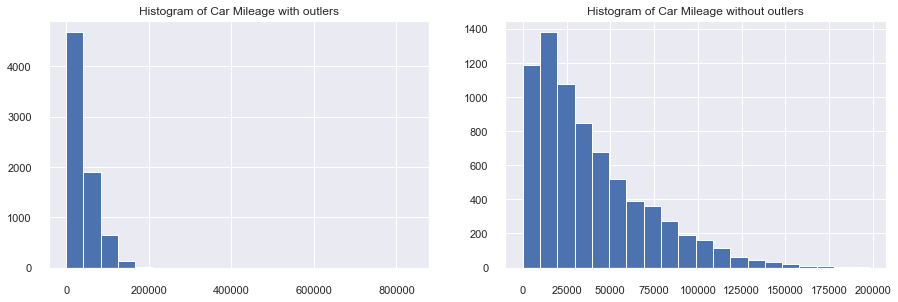

In [37]:
fig = plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
ax1= new_file.Car_Mileage.hist(bins=20)
ax1.set_title('Histogram of Car Mileage with outlers')
plt.subplot(2, 2, 2)
ax2 = new_data.Car_Mileage.hist(bins=20)
ax2.set_title('Histogram of Car Mileage without outlers')

The data set still has a lot of outliers as the histogram is still not normally distributed. However, I will continue the analysis with these outliers.

In [38]:
new_data.Car_Mileage.describe()

count      7365.000000
mean      39041.428242
std       32321.904672
min           1.000000
25%       14374.000000
50%       30000.000000
75%       55982.000000
max      197500.000000
Name: Car_Mileage, dtype: float64

- 75% of cars has mileage less than 56,000 miles.
- 30,000 is the average car mileage 

Text(0.5, 1.0, 'Car Price Vs Car Mileage after removing outliers')

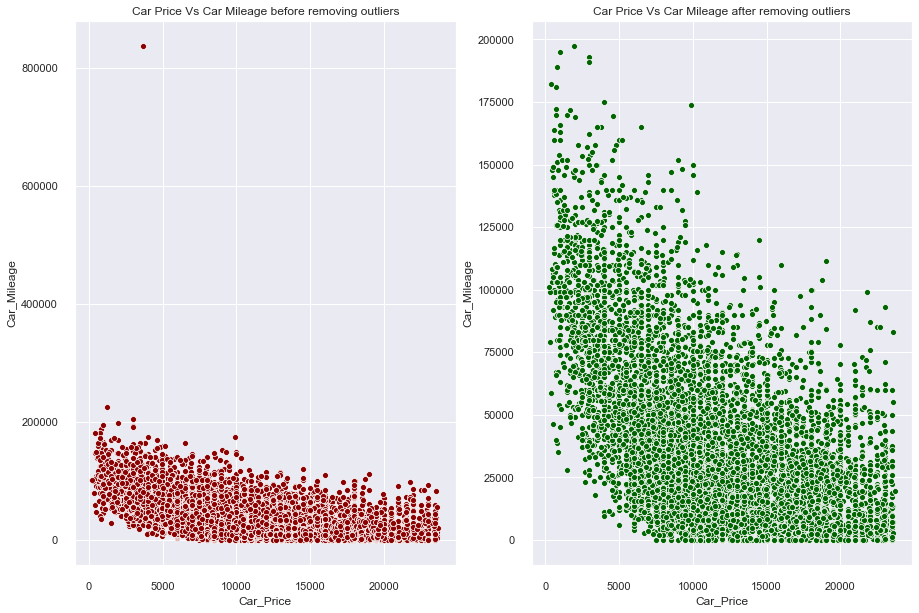

In [39]:
sns.set(style="darkgrid")

fig,ax=plt.subplots(1,2,figsize=(15,10),squeeze=False)

sns.scatterplot(x='Car_Price',y='Car_Mileage',data=new_file,ax=ax[0][0], color='darkred')
sns.scatterplot(x='Car_Price',y='Car_Mileage',data=new_data,ax=ax[0][1], color='darkgreen')

ax[0][0].set_title('Car Price Vs Car Mileage before removing outliers')
ax[0][1].set_title('Car Price Vs Car Mileage after removing outliers')

## Relationship between Car vs Mileage

Text(0.5, 1.0, 'Correlation between car prices and Mileage')

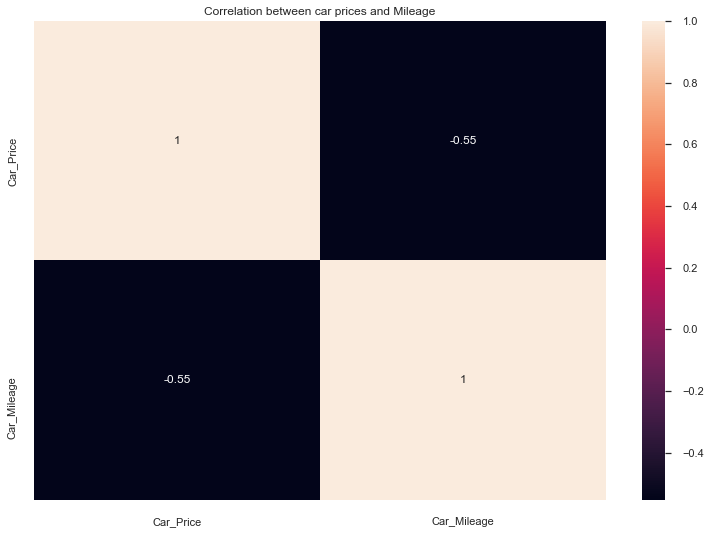

In [40]:
corr = new_data[['Car_Price','Car_Mileage']].corr()
sns.heatmap(corr,annot=True)
plt.title('Correlation between car prices and Mileage')

Negative Correlation make sense as car mileage goes up the car prices comes down.

# Fuel types

What type of car has the most listed in terms of fuel?

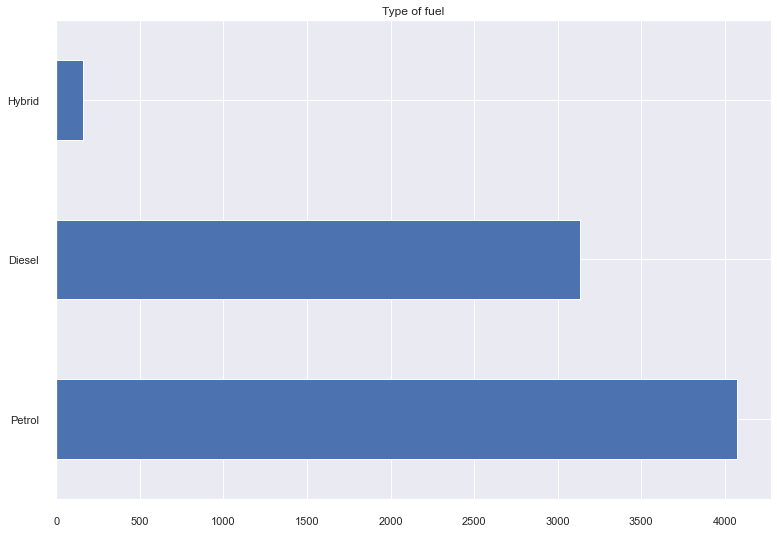

In [41]:
new_data.Car_Filling_in.value_counts().plot(kind='barh',title = 'Type of fuel')

- For Petrol and Diesel - Number of the Car Listing are the same.

- Hybrid cars are lowest are among the listing.

Text(0.5, 1.0, 'Car Price Vs Car Mileage with Hybird Fuel')

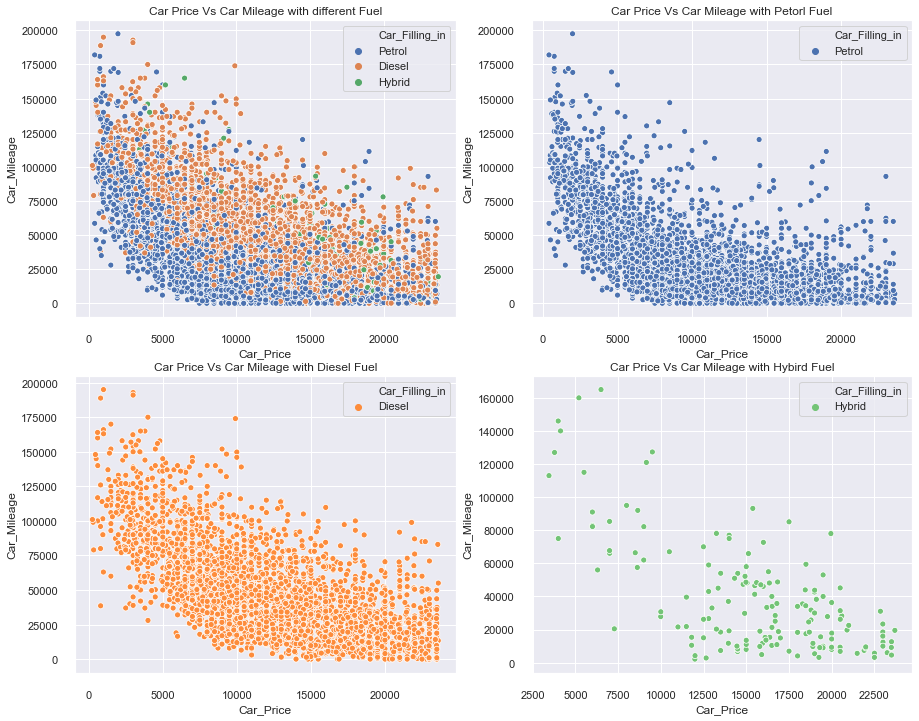

In [42]:
sns.set(style="darkgrid")

Petrol = new_data[new_data['Car_Filling_in']=='Petrol']
Diesel = new_data[new_data['Car_Filling_in']=='Diesel']
Hybrid = new_data[new_data['Car_Filling_in']=='Hybrid']

fig,ax=plt.subplots(2,2,figsize=(15,12),squeeze=False)
plt.title('Car Price Vs Car Mileage')
sns.scatterplot(x='Car_Price',y='Car_Mileage',hue = 'Car_Filling_in',data=new_data,ax=ax[0][0])
sns.scatterplot(x='Car_Price',y='Car_Mileage',hue = 'Car_Filling_in',data=Petrol,ax=ax[0][1])
sns.scatterplot(x='Car_Price',y='Car_Mileage',hue = 'Car_Filling_in',data=Diesel,ax=ax[1][0], palette='Oranges')
sns.scatterplot(x='Car_Price',y='Car_Mileage',hue = 'Car_Filling_in',data=Hybrid,ax=ax[1][1], palette='Greens')

ax[0][0].set_title('Car Price Vs Car Mileage with different Fuel')
ax[0][1].set_title('Car Price Vs Car Mileage with Petorl Fuel')
ax[1][0].set_title('Car Price Vs Car Mileage with Diesel Fuel')
ax[1][1].set_title('Car Price Vs Car Mileage with Hybird Fuel')

- Relationship between Car Prices vs Mileage is still negative in terms of different fuel 
## Are Diesel and Hybrid cars are more expensive then Petrol cars?

In [43]:
Type = pd.pivot_table(new_data,index='Car_Year',columns='Car_Filling_in',values='Car_Price',aggfunc='mean')

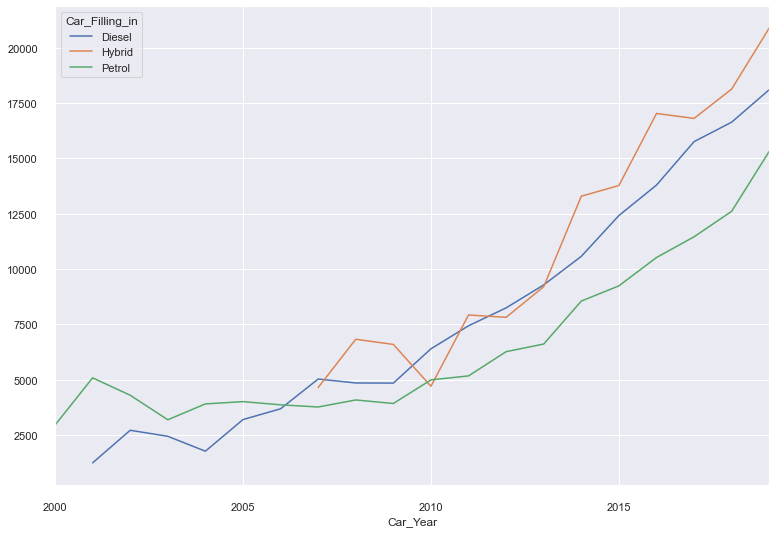

In [44]:

Type.loc['2000':'2019'].plot()


In [45]:
Type.describe()

Car_Filling_in,Diesel,Hybrid,Petrol
count,24.000000,14.000000,34.000000
mean,8645.407260,10817.200340,7946.704109
std,6384.678443,5706.103523,4438.205055
min,295.000000,3775.000000,2949.875000
25%,3563.882486,6653.333333,4138.130952
50%,6917.458179,8565.166667,6667.374214
75%,12763.509620,16050.553571,10204.503385
max,22000.000000,20895.857143,18750.000000


Hybrid and Diesel cars are clearly more expensive than petrol cars.

- On Average Hybrid Cars are £2,000 more expensive than petrol cars. The reason could be Hybrid cars were introduced in early 2000s and its still growing in its popularity as environmental crisis are widely discussed.   

# Manual vs Automatic - Gearbox cars

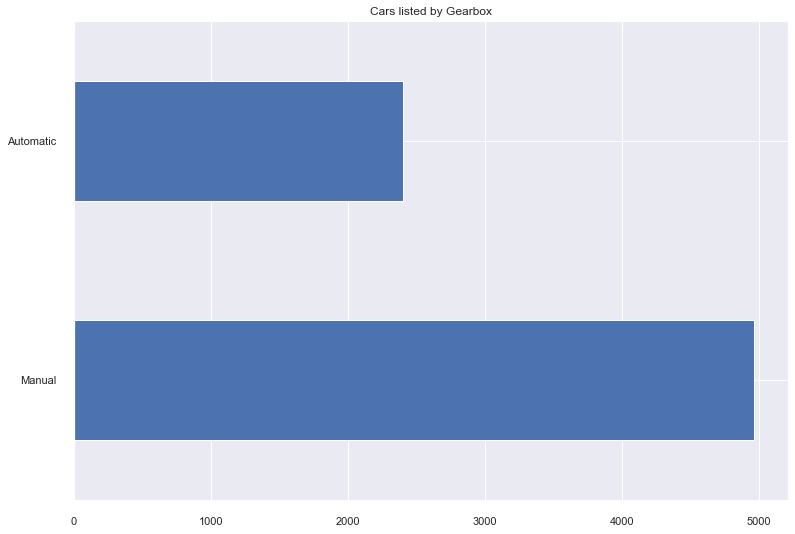

In [46]:
new_data.Car_Type_Vehicle.value_counts().plot(kind='barh',title='Cars listed by Gearbox')

There are twice as many Manual vs Automatic Cars.

Text(0.5, 1.0, 'Car Price Vs Car Mileage with different Gearbox cars')

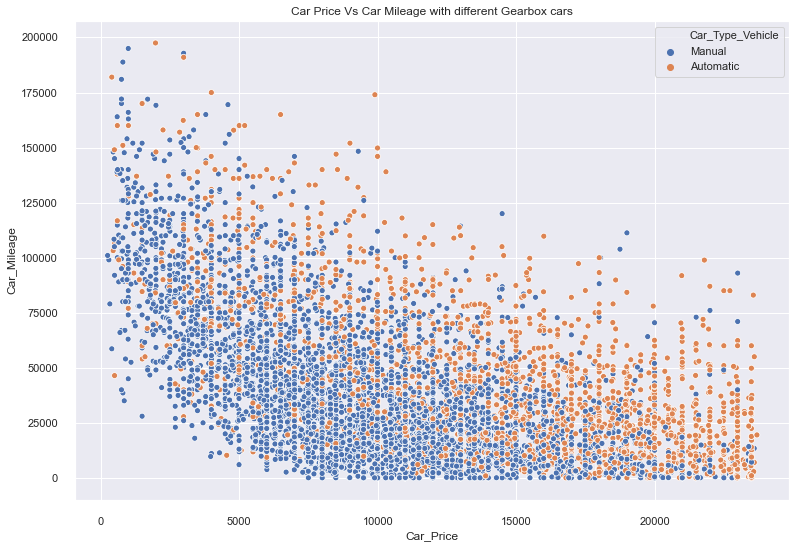

In [47]:
sns.scatterplot(x='Car_Price',y='Car_Mileage',hue = 'Car_Type_Vehicle',data=new_data)
plt.title('Car Price Vs Car Mileage with different Gearbox cars')

In [48]:
Prices = pd.pivot_table(new_data,index='Car_Year',columns='Car_Type_Vehicle',values='Car_Price',aggfunc='mean')
Num_Vec =  pd.pivot_table(new_data,index='Car_Year',columns='Car_Type_Vehicle',values='Car_Price',aggfunc='count')
Num_Mil =  pd.pivot_table(new_data,index='Car_Year',columns='Car_Type_Vehicle',values='Car_Mileage',aggfunc='mean')

Text(0.5, 1.0, 'Car Mileage with different gearbox')

<Figure size 1080x720 with 0 Axes>

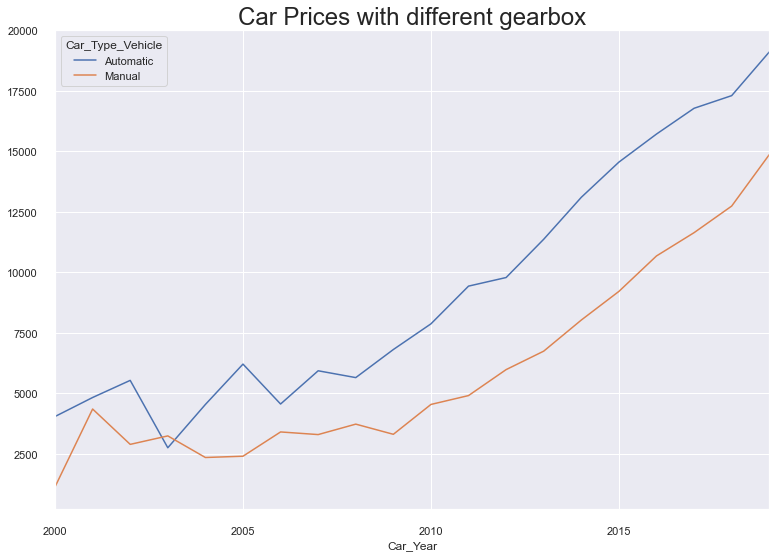

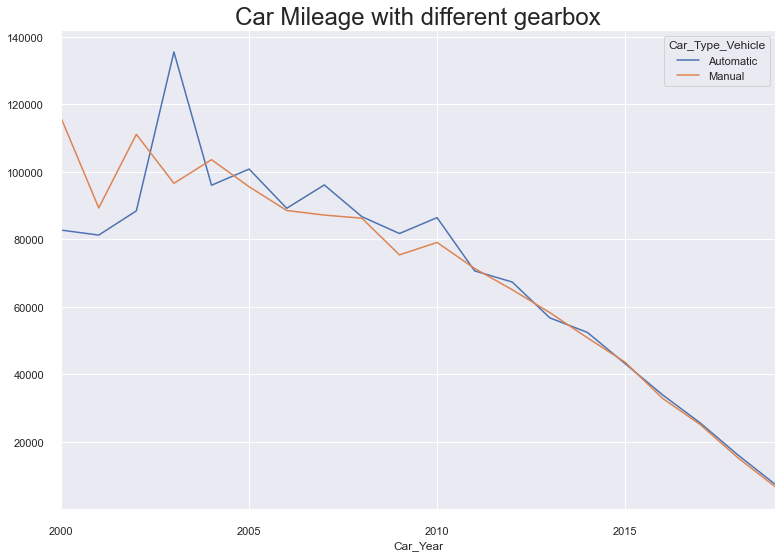

In [49]:
sns.set(style="darkgrid")
fig = plt.figure(figsize=(15,10))

#ax1 = Num_Vec.loc['2000':'2019'].plot()
ax1 = Prices.loc['2000':'2019'].plot()
ax2 = Num_Mil.loc['2000':'2019'].plot()
sns.set_context('poster') 
ax1.set_title('Car Prices with different gearbox')
ax2.set_title('Car Mileage with different gearbox')

Automatic Cars are clearly more expensive than manual.

- On Average they are £1,500 more expensive than Manual.

# Make

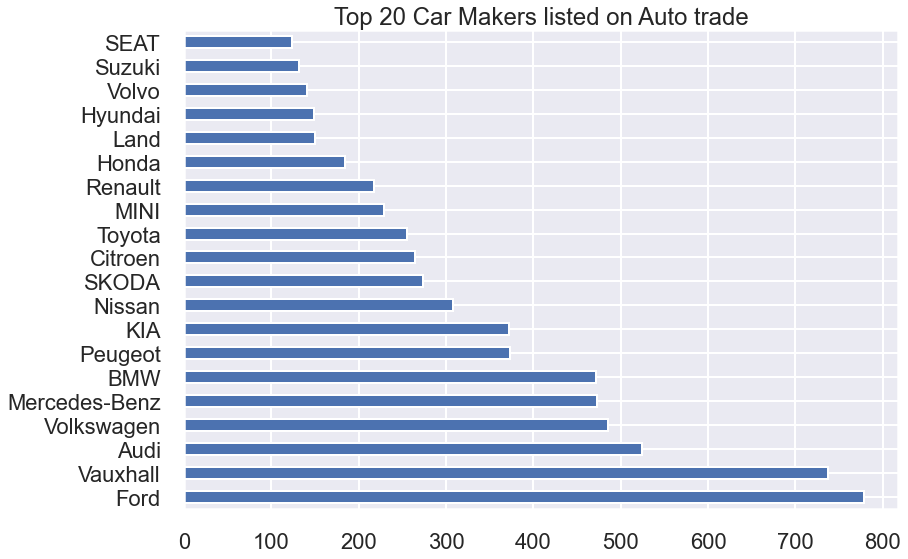

In [50]:
new_data.Car_Make.value_counts().nlargest(20).plot(kind='barh',title='Top 20 Car Makers listed on Auto trade')
plt.rcParams['font.family'] = 'sans-poster'
plt.rcParams['axes.edgecolor']='#333F4B'

Ford is the most listed car on AutoTrade and also it is most common car sold in UK.

Out of top 5, Three car makers are German.


In [51]:
top20 = new_data.Car_Make.value_counts().nlargest(5).index

In [52]:
MK_Y = pd.pivot_table(new_data,index='Car_Year',columns='Car_Make',values='Car_Price',aggfunc='mean')
MK_V =  pd.pivot_table(new_data,index='Car_Year',columns='Car_Make',values='Car_Price',aggfunc='count')
MK_Mil =  pd.pivot_table(new_data,index='Car_Year',columns='Car_Make',values='Car_Mileage',aggfunc='mean')


Text(0.5, 1.0, 'Avg Car Mileage for Top 5 Car Maker')

<Figure size 1080x720 with 0 Axes>

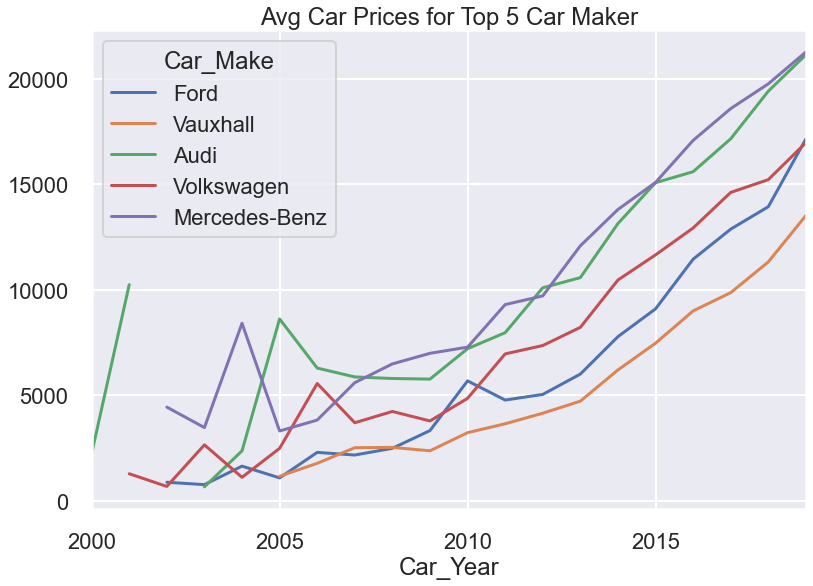

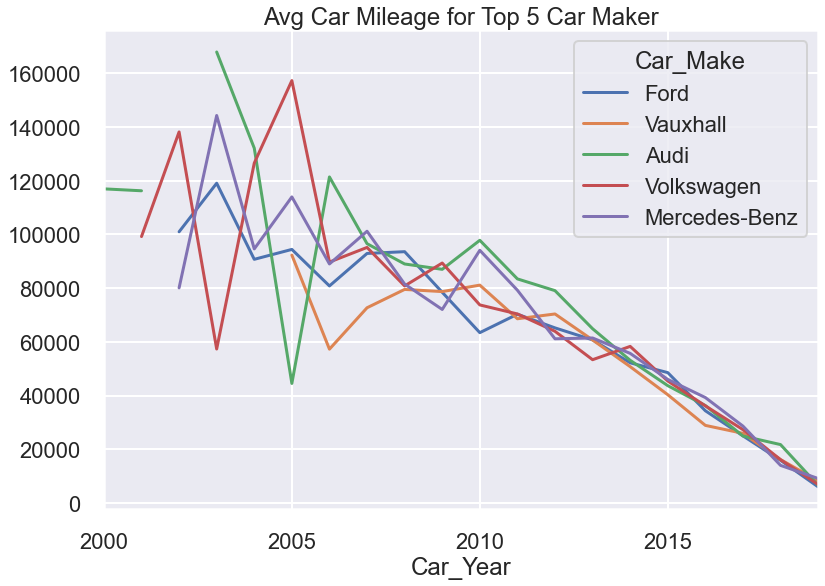

In [53]:
sns.set(style="darkgrid")
fig = plt.figure(figsize=(15,10))
sns.set_context('poster') 
ax1 = MK_Y[top20].loc['2000':'2019'].plot()
ax2 = MK_Mil[top20].loc['2000':'2019'].plot()
sns.set_context('poster') 
ax1.set_title('Avg Car Prices for Top 5 Car Maker')
ax2.set_title('Avg Car Mileage for Top 5 Car Maker')

- Mercedes and Audi are clearly more expensive and can be considered as Luxury car

- Vauxhall is the cheapest among the top 5 listing followed by ford on Auto Trade.

- Volkswagen and Audi seem to rack up the most mileage, which can seen as the most reliable cars.

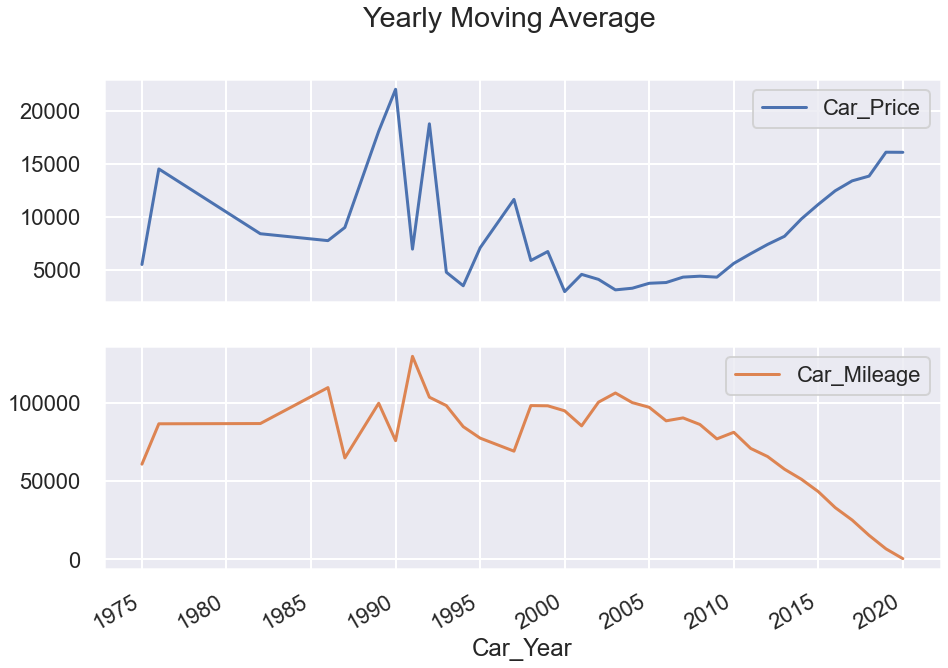

In [54]:
# Extract the month from the index of cars
index_yy= new_data.set_index('Car_Year')
index_Year = index_yy.index
#index_Year
# # # Compute the mean car rate for each year
Car_by_year= new_data.groupby(index_Year).mean()

ax = Car_by_year.plot(subplots=True,figsize=(15,10),title ='Yearly Moving Average')
plt.show()

The graph above suggests all the cars build in early 2000s doesn't hold their car prices for long time whereas some of the classic cars that were build in 1980s and 90s has maintained their prices.

# Engine_Size

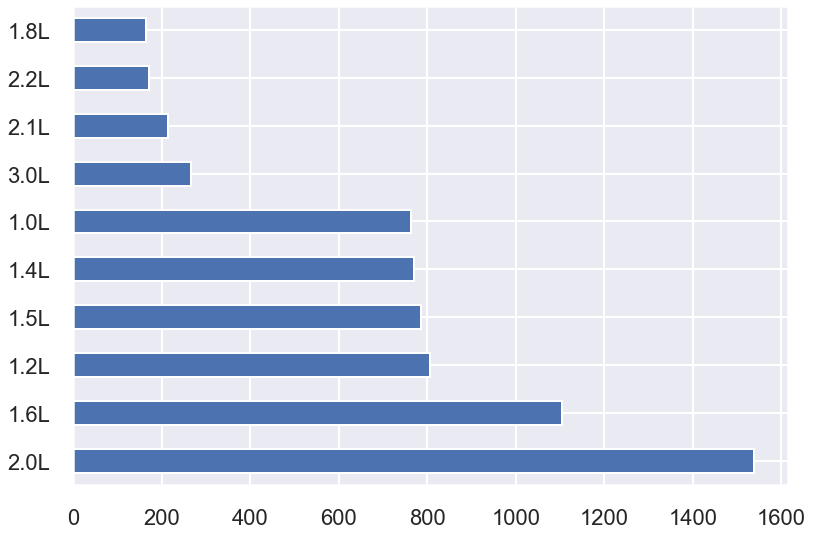

In [55]:
engi = new_data.Car_engine_size.value_counts().nlargest(10).plot(kind='barh')

2.0L are the most common cars listed on AutoTrade.

In [56]:
engine = new_data.Car_engine_size.value_counts().nlargest(10).index
#engine

In [57]:
eng = new_data[new_data['Car_engine_size'].isin(engine)]

- 3.0 Liters are the most expensive cars listed
- 1.0 Liters are the least expensive cars listed

In [58]:
EN = pd.pivot_table(eng,index='Car_engine_size',columns='Car_Make',values='Car_Price',aggfunc='mean')

In [59]:
x = EN[['Ford', 'Vauxhall', 'Audi', 'Volkswagen', 'Mercedes-Benz']]

Text(0.5, 1.0, 'Top 5 Car Makers listed by Engine Size')

<Figure size 1080x720 with 0 Axes>

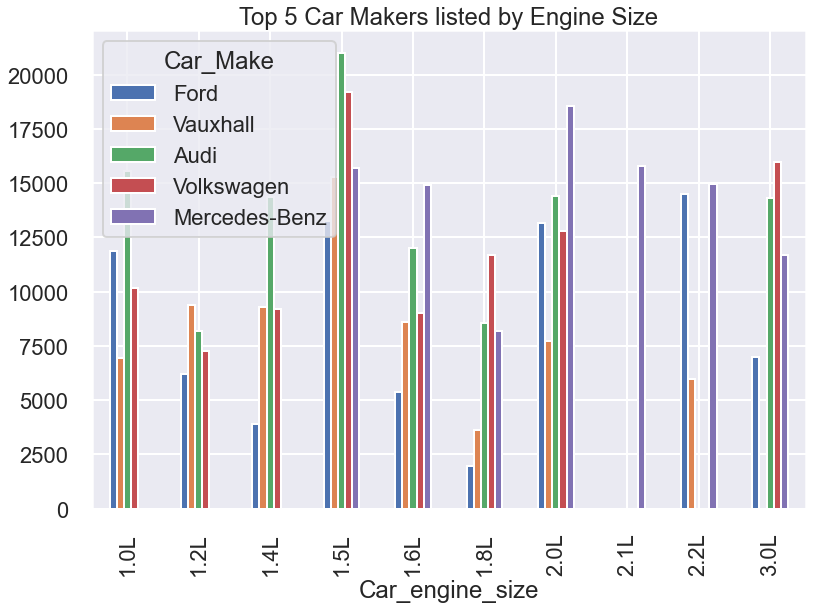

In [60]:
ax= plt.figure(figsize=(15,10))
ax = x.plot(kind='bar')
#sns.set_context('poster') 
ax.set_title('Top 5 Car Makers listed by Engine Size')
ax.ylabel('')

Ford is more cheaper than Audi and Volkswagen even when the engine size is bigger 

In [61]:
grade_bath = ['Car_engine_size', 'Car_Type_Vehicle']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(eng[grade_bath[0]], eng[grade_bath[1]]).style.background_gradient(cmap = cm)

Car_Type_Vehicle,Automatic,Manual
Car_engine_size,,
1.0L,108,654
1.2L,101,704
1.4L,144,627
1.5L,206,580
1.6L,251,853
1.8L,89,76
2.0L,714,823
2.1L,187,27
2.2L,86,84


It is interesting to see most cars listed on Auto trades shows that 2.0L producing more Automatic Cars compare to any other engine size which is mainly dominated by manual cars.

In [62]:
grade_bath = ['Car_engine_size', 'Car_Type_Door']
cm = sns.light_palette("orange", as_cmap=True)
pd.crosstab(eng[grade_bath[0]], eng[grade_bath[1]]).style.background_gradient(cmap = cm)

Car_Type_Door,Convertible,Coupe,Estate,Hatchback,Limousine,MPV,Minibus,Pickup,SUV,Saloon
Car_engine_size,,,,,,,,,,
1.0L,6,12,19,618,0,16,0,0,90,1
1.2L,16,0,12,528,0,16,0,0,233,0
1.4L,13,7,26,556,0,42,0,0,120,7
1.5L,14,8,47,394,0,76,0,0,235,12
1.6L,29,13,83,478,0,125,0,0,356,20
1.8L,20,9,12,87,0,13,0,0,14,10
2.0L,55,105,196,390,0,81,4,10,459,237
2.1L,25,25,31,29,0,1,2,0,32,69
2.2L,4,2,11,5,0,4,0,9,109,26


- It Looks like Hatchback is one of the most common car listed and they trend to have smaller engine.

- SUV and MPV trend to have bigger engine size than hatchback.


Text(0.5, 1.0, 'Type of Vehicle by Car Prices')

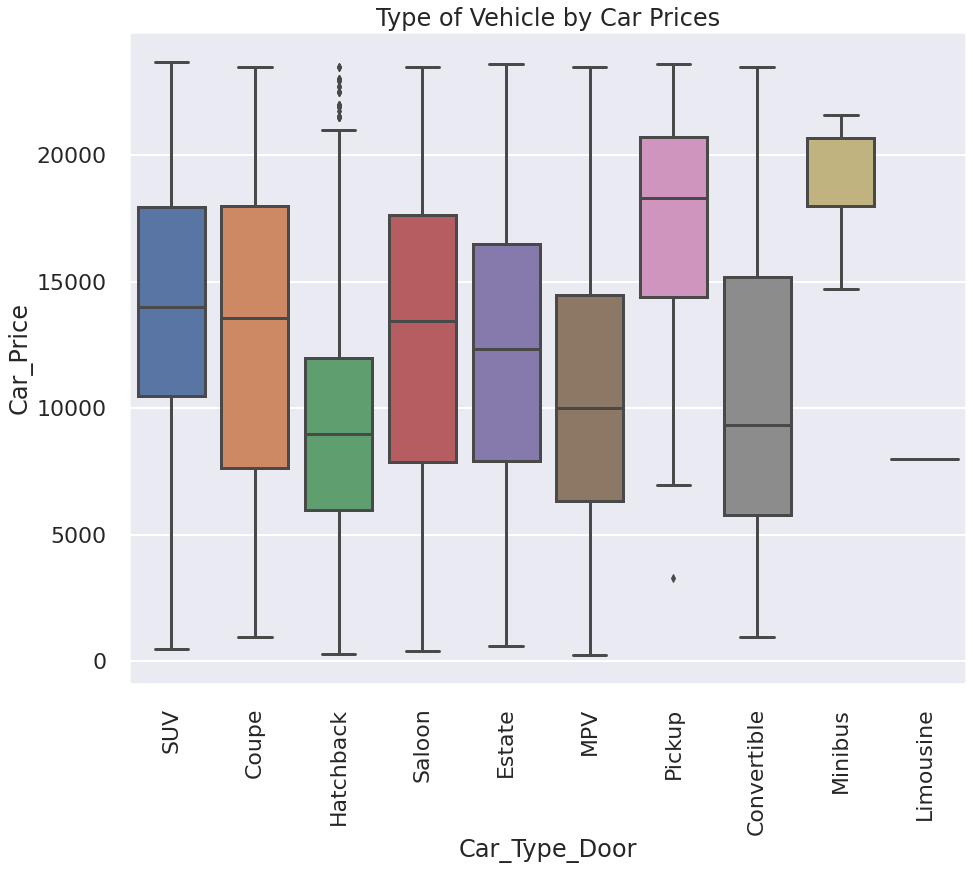

In [93]:
#sns.set(style="darkgrid")
sns.set_context('poster') 
ax =plt.figure(figsize=(15,12))
ax  = sns.boxplot(x='Car_Type_Door',y='Car_Price',data=new_data)
plt.xticks(rotation=90)
plt.title('Type of Vehicle by Car Prices')

# Export to csv

In [53]:
#new_data.to_csv('Autotrade_EDA.csv')